# SALES ANALYSIS - Phân tích doan số

In [ ]:
import pandas as pd

# Read the CSV file
file_path = '/Users/quockhoile/Desktop/DaiHoc/Cac Mo hinh DL/milestone/code/data_process/cleaned_data/df_revenue_clean.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

/var/folders/0w/lyp5nttn3qng2dxl7wr_hd700000gn/T/ipykernel_25033/2907315043.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,Hour,DayOfWeek,MonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,2010-12


## Xu hướng doanh số theo thời gian

### Doanh số theo tháng 

Chi tiết doanh số theo tháng (Dữ liệu bao gồm cả năm 2010 và 2011):
MonthYear
2010-12     821452.730
2011-01     689811.610
2011-02     522545.560
2011-03     716215.260
2011-04     536968.491
2011-05     769296.610
2011-06     760547.010
2011-07     718076.121
2011-08     757841.380
2011-09    1056435.192
2011-10    1151263.730
2011-11    1503866.780
2011-12     637790.330
Freq: M, Name: TotalAmount, dtype: float64


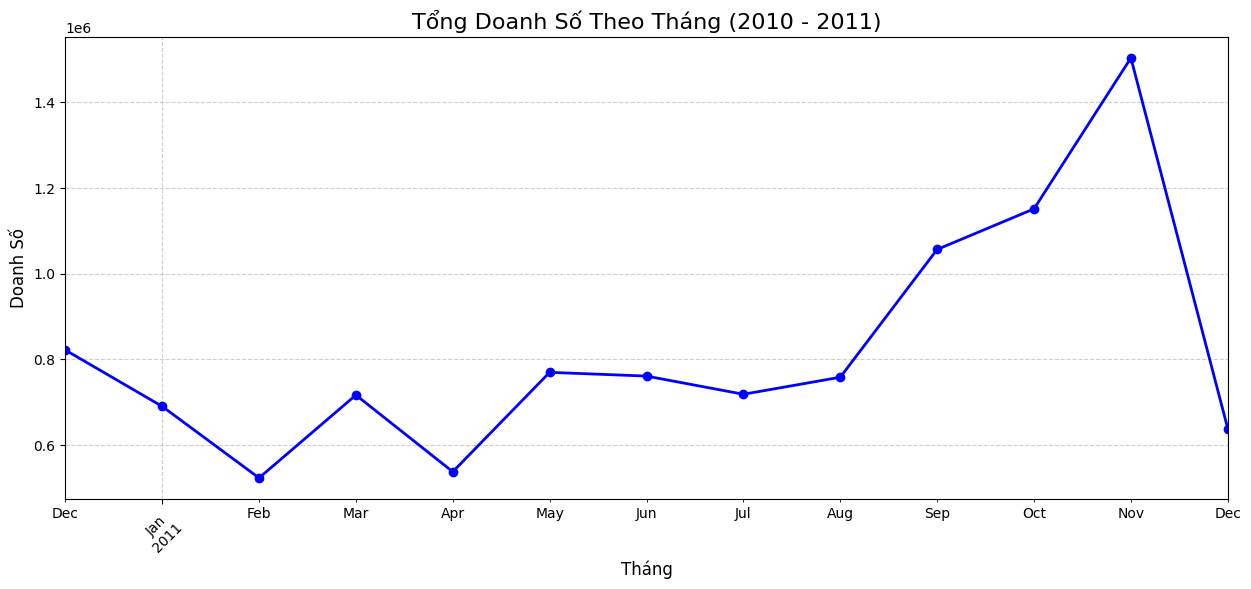

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

# 2. Doanh số theo tháng (Monthly Sales)
monthly_sales = df.groupby('MonthYear')['TotalAmount'].sum()

# In thống kê chi tiết
print("Chi tiết doanh số theo tháng (Dữ liệu bao gồm cả năm 2010 và 2011):")
print(monthly_sales)

# Top 3 cao nhất
top_3_months = monthly_sales.sort_values(ascending=False).head(3)
print("\nTop 3 tháng có doanh số cao nhất:")
print(top_3_months)

# Top 3 thấp nhất
top_3_lowest_months = monthly_sales.sort_values(ascending=True).head(3)
print("\nTop 3 tháng có doanh số thấp nhất:")
print(top_3_lowest_months)

# Visualization
plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Tổng Doanh Số Theo Tháng (2010 - 2011)', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh Số', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

### Doanh số theo tuần

Chi tiết doanh số theo tuần:
           WeekLabel  TotalAmount
0  Tuần 1 - T12/2010    184669.47
1  Tuần 2 - T12/2010    329108.22
2  Tuần 3 - T12/2010    215357.04
3  Tuần 4 - T12/2010     92318.00
4   Tuần 1 - T1/2011         0.00


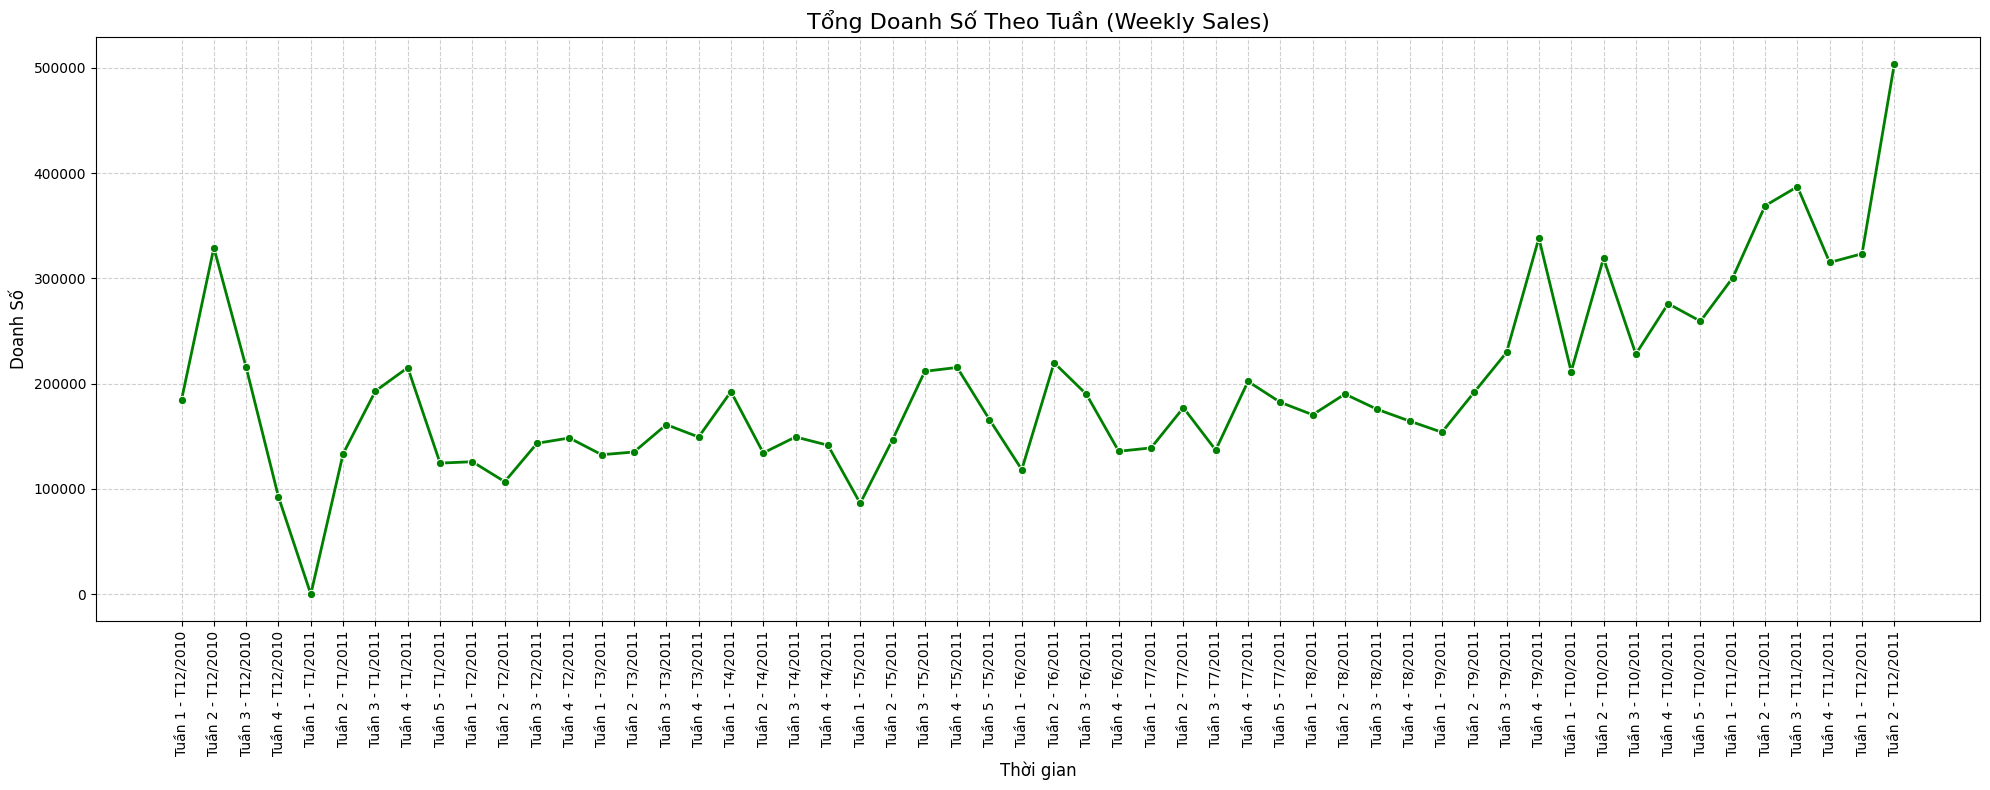

In [ ]:
# 3. Doanh số theo tuần (Weekly Sales)
# Resample theo tuần và reset index để có thể thao tác với cột ngày tháng
weekly_sales = df.set_index('InvoiceDate').resample('W')['TotalAmount'].sum().reset_index()

# Tạo cột nhãn hiển thị dạng "Tuần X - T.Y/Năm"
# Công thức (day - 1) // 7 + 1 dùng để ước lượng tuần thứ mấy trong tháng (1-7: Tuần 1, 8-14: Tuần 2...)
weekly_sales['WeekLabel'] = weekly_sales['InvoiceDate'].apply(
    lambda x: f"Tuần {(x.day - 1) // 7 + 1} - T{x.month}/{x.year}"
)

# In thống kê chi tiết
print("Chi tiết doanh số theo tuần:")
print(weekly_sales[['WeekLabel', 'TotalAmount']].head())

plt.figure(figsize=(20, 8)) # Tăng kích thước ngang để đủ chỗ cho các nhãn
sns.lineplot(data=weekly_sales, x='WeekLabel', y='TotalAmount', color='green', marker='o', linewidth=2)

plt.title('Tổng Doanh Số Theo Tuần (Weekly Sales)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Doanh Số', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Xoay nhãn trục X 90 độ để hiển thị hết tên các tuần mà không bị đè lên nhau
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

### Mùa cao điểm và thấp điểm

In [ ]:
# 4. Tìm mùa cao điểm / thấp điểm
max_month = monthly_sales.idxmax()
max_value = monthly_sales.max()

min_month = monthly_sales.idxmin()
min_value = monthly_sales.min()

print(f"📈 Mùa cao điểm nhất: {max_month} với doanh số {max_value:,.0f}")
print(f"📉 Mùa thấp điểm nhất: {min_month} với doanh số {min_value:,.0f}")

📈 Mùa cao điểm nhất: 2011-11 với doanh số 1,503,867
📉 Mùa thấp điểm nhất: 2011-02 với doanh số 522,546


### So sánh doanh số 2010 vs 2011

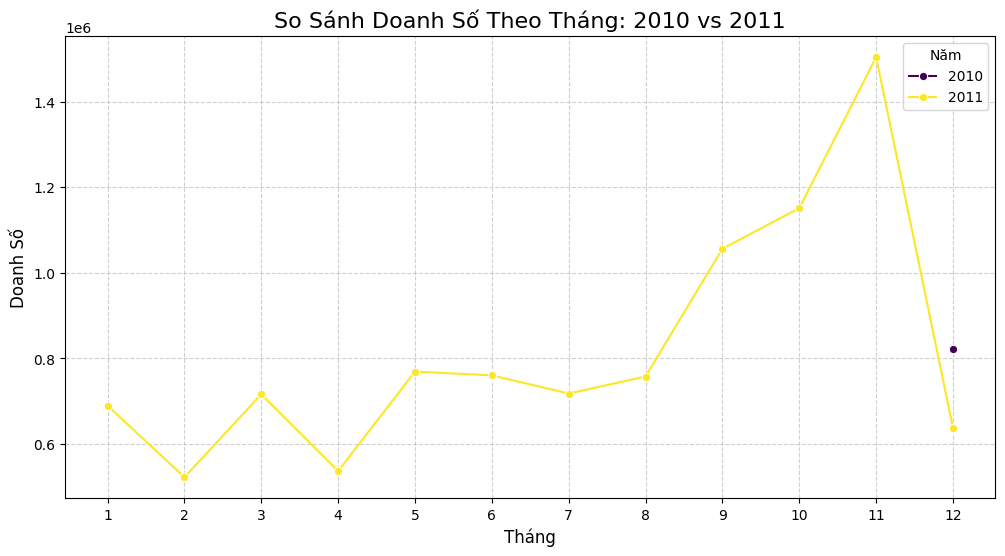

In [ ]:
# 5. Doanh số 2010 vs 2011
# Group by Year and Month to compare
sales_by_year_month = df.groupby([df['InvoiceDate'].dt.year.rename('Year'), df['InvoiceDate'].dt.month.rename('Month')])['TotalAmount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year_month, x='Month', y='TotalAmount', hue='Year', palette='viridis', marker='o')
plt.title('So Sánh Doanh Số Theo Tháng: 2010 vs 2011', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh Số', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Năm')
plt.show()

### Nhận xét